# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Use the shape attribute to get the number of rows and colums
num_rows, num_cols = df.shape
print("The number of rows is:", num_rows)
print("The number of columns is:", num_cols)


#### Observations:
By using the `shape` attribute of `pandas.DataFrame`, we can see that there are 1898 rows and 9 columns. 

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

#### Observations:
By using `df.info()`, we can see the data has 3 different datatypes:
- 1 column of type float64, which is a 64-bit floating point number
- 4 columns of type int64, which is a 64-bit integer
- 4 columns of type object, which is often used to store string values

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Loop through each object-type column and print the unique values
for col in df.select_dtypes(include=['object']):
    print(col)
    print(df[col].unique())
    print()

#### Observations:
Based on the output of `df.info()` from the previous question, we can see that the Non-Null Count is the same as the total number of rows, for each of the columns. This implies that there is no missing data. However, the above code allows us to look at all the unique values of each of those columns. We can see that for `rating` we have a unique value of 'Not given', indiciating missing ratings. We need to handle this. We can handle this by replacing these values with `NaN` values, with the following code below:

In [ ]:
# Replace all 'Not given' values in column 'rating' with NaN, and make the changes in the original dataframe df, then print the unique values
df['rating'].replace('Not given', np.nan, inplace=True)
print(df['rating'].unique())

#### Observations:
After executing the code, we can look again at the unique values for column `rating`. We see that the 'Not given' rating values have now been replaced with 'NaN'. Now also for future use in analysis that follows, it might be useful and appropriate to convert `rating` types to be of type float, rather than string objects, since they do represent numerical ratings up to 5. We can do this with the following code:


In [ ]:
# Convert all values in column 'rating' to be float-type
df['rating'] = df['rating'].astype(float)
df.info()

From calling `info()` on our dataframe, we can see that the column for `rating` has now been changed from `object` to `float64`.  

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Get summary statistics on column 'food_preparation_time'
df['food_preparation_time'].describe()

#### Observations:
Based on the output of the `describe()` function on the `food_preparation_time` column, we can see:

- min: 20 minutes
- average: 27.371970 minutes
- max: 35 minutes

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Sum up the numbers of rows that have missing or NaN values in column 'rating'
df['rating'].isna().sum()

#### Observations:
We can use `isna()` to find and sum up how many orders are have the NaN value we assigned before. According to the output: 736 orders are not rated. 


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

**Observations on Restaurant Name**

`restaurant_name` is a categorical variable that represents the name of the restaurant that received the food ordere. We can perform univariate analysis on this column to look for any insights into the frequency of orders placed at each restaurant and possibly infer which restaurants are more popular.

Let us begin by first looking at the frequency distribution.  We can look at a frequency distribution table and create a bar chart from this to show the number of orders placed at each restraunt. This can give us a visual representation on the more popular restaurant and the less popular restaurants.

In [ ]:
# Create a frequency distribution of the restaurant_name column
restaurant_counts = df['restaurant_name'].value_counts()

# Print the frequency distribution table
print(restaurant_counts)

# Create a bar chart of the frequency distribution
plt.bar(restaurant_counts.index, restaurant_counts.values)
plt.xlabel('Restaurant Name')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Restaurants')
plt.xticks(rotation=90)
plt.show()

#### Observations:
Based on the frequency distribution, it clearly looks like certain restaurants are more popular than others. Just looking at this frequency of orders, it looks like some of the restaurants further to the right are not significantly different in their order count.

Let us look further into this and look at the percentage distribution. The percentage distribution can show the percentage of food orders placed at each restaurant, based on their market share among the customers. This can help identify the most popular restaurants and the ones that are less popular, based on the percentage of orders they receive relative to the other restaurants in the dataset.

In [ ]:
# Create a percentage distribution of the restaurant_name column
restaurant_counts = df['restaurant_name'].value_counts(normalize=True) * 100

# Print the percentage distribution table
print(restaurant_counts)

# Create a pie chart of the percentage distribution
plt.pie(restaurant_counts.values, labels=restaurant_counts.index, autopct='%1.1f%%')
plt.title('Percentage Distribution of Restaurants')
plt.show()


#### Observations:
A few restaurant appear to account for a large part of the market share among customers. The top 4 restaurants shown here account for about 30% of the total orders of the dataset. From this we can infer that a few of the most popular restaurants account for a large part of the market share. 

**Observations on Cuisine Type**

`cuisine_type` is a categorical variable that represents the type of cuisine that was ordered by the customer. We can perform univariate analysis on this column to look for any insights into the frequency of each cuisine type and look for any insights into food preferences and tastes of the customers. 

Let us begin by first looking at the frequency distribution.  We can look at a frequency distribution table and create a bar chart from this and help identify the most popular cuisines and also the ones that are less popular. 

In [ ]:
# Create a frequency distribution of the restaurant_name column
cuisine_counts = df['cuisine_type'].value_counts()

# Print the frequency distribution table
print(cuisine_counts)

# Create a bar chart of the frequency distribution
plt.bar(cuisine_counts.index, cuisine_counts.values)
plt.xlabel('Cuisine Type')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Cuisine Types')
plt.xticks(rotation=90)
plt.show()

#### Observations:
Based on the frequency distribution, it clearly looks like certain cuisine types are more popular than others. Let us continue and look at the percentage distribution:

In [ ]:
# Create a percentage distribution of the cuisine type column
cuisine_counts = df['cuisine_type'].value_counts(normalize=True) * 100

# Print the percentage distribution table
print(cuisine_counts)

# Create a pie chart of the percentage distribution
plt.pie(cuisine_counts.values, labels=cuisine_counts.index, autopct='%1.1f%%')
plt.title('Percentage Distribution of Cuisine Types')
plt.show()

#### Observations:
Based on the percentage distribution we can see insights that American, Japanese, Italian and Chinese food together account for about 82.6% of the total orders. These are clearly the most popular types of cuisine that dominate the market share. 

**Observations on Cost of the Order**

In [ ]:
df['cost_of_the_order'].describe()

In [ ]:
# Create a histogram of the cost_of_the_order column
sns.histplot(data=df, x='cost_of_the_order')
plt.show()
sns.boxplot(data=df, x='cost_of_the_order')
plt.show()

In [ ]:
# Create a density plot of the cost_of_the_order column
df['cost_of_the_order'].plot(kind='density')

# Set the plot title and axis labels
plt.title('Density Plot of Cost of the Order')
plt.xlabel('Cost')
plt.ylabel('Density')

# Show the plot
plt.show()

#### Observations:
- Minimum: $4.47
- Mean: $16.50
- Maximum: $35.41
- There are no outliers for `cost_of_the_order`
- It looks like most of the orders are in the range of $12 to $17

**Observations on Days of the Week**

In [ ]:
# Compute the frequency distribution of the day_of_the_week column
day_counts = df['day_of_the_week'].value_counts()

# Create a bar chart of the frequency distribution
day_counts.plot(kind='bar')

# Set the plot title and axis labels
plt.title('Frequency Distribution of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')

# Show the plot
plt.show()

In [ ]:
# Compute the percentage distribution of the day_of_the_week column
day_pct = df['day_of_the_week'].value_counts(normalize=True) * 100

# Create a pie chart of the percentage distribution
day_pct.plot(kind='pie', autopct='%1.1f%%')

# Set the plot title and legend
plt.title('Percentage Distribution of Orders by Day of the Week')
plt.legend(loc='best')

# Show the plot
plt.show()

#### Observations
A majority of the orders places were on the weekend. It is important to remember that there are 5 days (Monday, Tuesday, Wednesday, Thursday, Friday) that fall under 'Weekday' and only 2 days (Saturday and Sunday) that full under 'Weekend'. The number of orders places on the Weekend account for 71.2% of the total orders. 

**Observations on Food Preparation Time**

In [ ]:
df['food_preparation_time'].describe()

In [ ]:
# Create a boxplot of the food_preparation_time column
plt.boxplot(df['food_preparation_time'])

# Set the plot title and axis labels
plt.title('Boxplot of Food Preparation Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [ ]:
# Create a KDE plot of the food_preparation_time column, set the plot title and axis labels
sns.displot(data=df,x='food_preparation_time',kind='kde')
plt.title('Kernel Density Estimate of Food Preparation Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Density')

# Show the plot
plt.show()

#### Observations
- Minimum time: 20 minutes
- Mean time: 27.371970 minutes
- Maximum time: 35 minutes 
- There are no outliers for `food_preparation_time`
- The KDE is pretty symmetic with no anomolies

**Observations on Delivery Time**

In [ ]:
df['delivery_time'].describe()

In [ ]:
# Create a boxplot of the delivery_time column
plt.boxplot(df['delivery_time'])

# Set the plot title and axis labels
plt.title('Boxplot of Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [ ]:
# Create a KDE plot of the delivery_time column, set the plot title and axis labels
sns.displot(data=df,x='delivery_time',kind='kde')
plt.title('Kernel Density Estimate of Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Density')

# Show the plot
plt.show()

#### Observations
- Minimum time: 15 minutes
- Mean time: 24.161749 minutes
- Maximum time: 33 minutes
- There are no outliers for `delivery_time`
- The KDE looks a bit odd from about 22 minutes to about 30 minutes, showing higher density of this range


**Observations on Rating**

In [ ]:
df['rating'].mode()

In [ ]:
# Create a frequency distribution of ratings
rating_counts = df['rating'].value_counts()

# Print the counts
print(rating_counts)

# Plot the frequency distribution as a bar chart
rating_counts.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Ratings')
plt.show()

In [ ]:
# Create a percentage distribution of ratings
rating_pct = df['rating'].value_counts(normalize=True) * 100

# Print the percentages
print(rating_pct)

# Plot the percentage distribution as a pie chart
rating_pct.plot(kind='pie')
plt.axis('equal')
plt.title('Percentage Distribution of Ratings')
plt.show()

#### Observations
- The most common rating given is 5 stars
- 5 stars is the most given rating, followed by 4 stars, followed by 3 stars
- 5 star ratings account for about 50.6% of the total ratings given
- 4 star ratings account for about 33.2% of the total ratings given
- 3 star ratings account for about 16.2% of the total ratings given

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Get the top 5 restaurants by number of orders received
top_restaurants = df['restaurant_name'].value_counts().head(5)

# Print the top 5 restaurants
print(top_restaurants)

#### Observations:
1. Shake Shack
2. The Meatball Shop
3. Blue Ribbon Sushi
4. Blue Ribbon Fried Chicken
5. Parm


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Filter the DataFrame to include only weekends
weekend_orders = df[df['day_of_the_week'] == 'Weekend']

# Get the most popular cuisine on weekends
most_popular_cuisine = weekend_orders['cuisine_type'].value_counts().head(1)

# Print the most popular cuisine
print("The most popular cuisine on weekends is: ", most_popular_cuisine.index[0])

#### Observations:
American is the most popular cuisine on the weekends. 


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Filter the DataFrame to include only orders with cost greater than 20 dollars
cost_above_20 = df[df['cost_of_the_order'] > 20]

# Calculate the percentage of orders with cost greater than 20 dollars
percent_above_20 = (cost_above_20.shape[0] / df.shape[0]) * 100

# Print the percentage of orders with cost above 20 dollars
print("Percentage of orders with cost above $20: {:.2f}%".format(percent_above_20))

#### Observations:
29.24% of the orders cost more than $20.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Calculate the mean delivery time
mean_delivery_time = df['delivery_time'].mean()

# Print the mean delivery time
print("The mean delivery time is: {:.2f} minutes".format(mean_delivery_time))

#### Observations:
The mean order delivery time is 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Get the top 3 most frequent customers
top_customers = df['customer_id'].value_counts().head(3)

# Print the top 3 most frequent customers
print("The top 3 most frequent customers are:")
for i, (customer_id, count) in enumerate(top_customers.items()):
    print("{}) Customer ID {}: {} orders".format(i+1, customer_id, count))

#### Observations:
1. Customer ID 52832: 13 orders
2. Customer ID 47440: 10 orders
3. Customer ID 83287: 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


<Axes: >

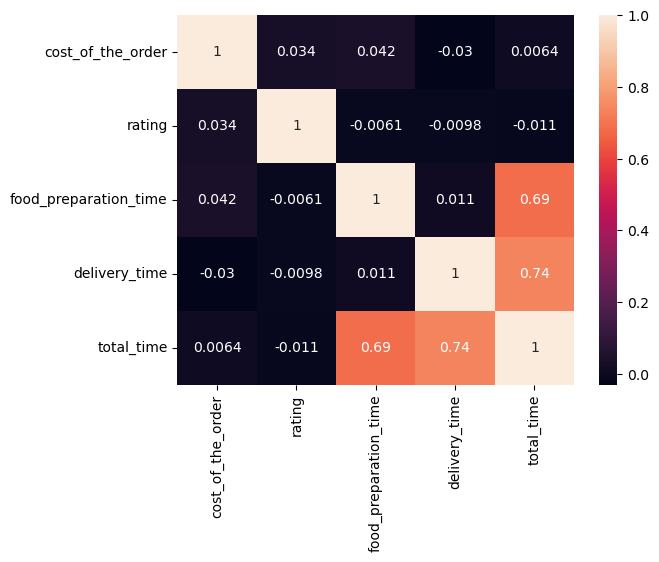

In [57]:
# Write the code here

# Create a new column 'total_time' as the sum of 'delivery_time' and 'food_preparation_time'
df['total_time'] = df['delivery_time'] + df['food_preparation_time']

# Select the columns to compute correlation for
cols = ['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time', 'total_time']

# Compute the correlation matrix
corr_matrix = df[cols].corr()

# Visualize the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True)

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Calculate the revenue generated by the company for each order
df['revenue'] = 0
df.loc[df['cost_of_the_order'] > 20, 'revenue'] = 0.25 * df['cost_of_the_order']
df.loc[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20), 'revenue'] = 0.15 * df['cost_of_the_order']

# Calculate the total revenue generated by the company
total_revenue = df['revenue'].sum()

# Print the total revenue generated by the company
print("The net revenue generated by the company across all orders is: ${:.2f}".format(total_revenue))

#### Observations:
The net revenue generated by the company across all orders is: $6166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---